#### Vivian Xia

## Exploring Hashing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

import random
from string import ascii_lowercase

from tabulate import tabulate

In [ ]:
def linear_search(mylist, item):
    
    i = 0
    while i < len(mylist):
        if mylist[i] == item:
            return i
        else:
            i = i + 1
        
    return None

In [ ]:
#binary search algorithm
class BinarySearch():

  def search_iterative(self, list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
      # ... check the middle element
      mid = (low + high) // 2
      guess = list[mid]
      # Found the item.
      if guess == item:
        return mid
      # The guess was too high.
      if guess > item:
        high = mid - 1
      # The guess was too low.
      else:
        low = mid + 1

    # Item doesn't exist
    return None

In [ ]:
def search_time(position):
    """ Search Time Algorithm.

    Time the search for values in an unsorted and sorted list and a set.
    
    Parameters
    ----------
    position: value to search.
    
    """
    
    bs = BinarySearch()
    
    start_time = time.perf_counter()
    linear_search(names_unsrt, position)
    end_time = time.perf_counter()
    unsrt_time = end_time - start_time #unsorted list search time
    
    start_time = time.perf_counter()
    bs.search_iterative(names_srt, position) 
    end_time = time.perf_counter()
    srt_time = end_time - start_time #sorted list search time
        
    start_time = time.perf_counter()
    names_set.remove(position)
    end_time = time.perf_counter()
    set_time = end_time - start_time #set search time
    
    return position, unsrt_time, srt_time, set_time

In [ ]:
#generate a random list of strings
np.random.seed(45)
list_string = []

for string in range(100000): 
  string = ''.join(random.choice(ascii_lowercase) for i in range(10))
  list_string.append(string)

In [ ]:
#create an unsorted list, sorted list, and set of the generated list
names_unsrt = list_string.copy()

names_set = list_string.copy()
names_set = set(names_set)

names_srt = list_string.copy()
names_srt = sorted(names_srt)

In [ ]:
#pick the names from the sorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions
position_10000 = names_srt[10000-1]
position_30000 = names_srt[30000-1]
position_50000 = names_srt[50000-1]
position_70000 = names_srt[70000-1]
position_90000 = names_srt[90000-1]
position_100000 = names_srt[100000-1]

In [ ]:
#search for these six names in each of the collections
position_list = [position_10000, position_30000, position_50000, position_70000, position_90000, position_100000]
time_list = [] #empty list to store searching times

for i in position_list:
    time_list.append(search_time(i)) #use search time algorithm to time the search on each string

In [ ]:
col_names = ["String","Linear Search Time", "Binary Search Time", "set.remove() Time"]

print(tabulate(time_list, headers=col_names, tablefmt="fancy_grid"))

╒════════════╤══════════════════════╤══════════════════════╤═════════════════════╕
│ String     │   Linear Search Time │   Binary Search Time │   set.remove() Time │
╞════════════╪══════════════════════╪══════════════════════╪═════════════════════╡
│ cpvmacaxxg │           0.00275404 │           1.5834e-05 │           2.417e-06 │
├────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ hvitqmfmau │           0.0129223  │           1.0834e-05 │           2.25e-06  │
├────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ myuzsiaqix │           0.0138698  │           3.25e-06   │           1.75e-06  │
├────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ sfrvzsqjjm │           0.0100495  │           1.1958e-05 │           2.042e-06 │
├────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ xjukhkzmvg │           0.00923888 │           1.0042e-05 │           1.708e-06 │
├───

In [ ]:
df = pd.DataFrame(time_list) #create a dataframe of the list of times
df.columns = col_names
df.head()

,String,Linear Search Time,Binary Search Time,set.remove() Time
0,cpvmacaxxg,0.002754,0.000016,0.000002
1,hvitqmfmau,0.012922,0.000011,0.000002
2,myuzsiaqix,0.013870,0.000003,0.000002
3,sfrvzsqjjm,0.010050,0.000012,0.000002
4,xjukhkzmvg,0.009239,0.000010,0.000002


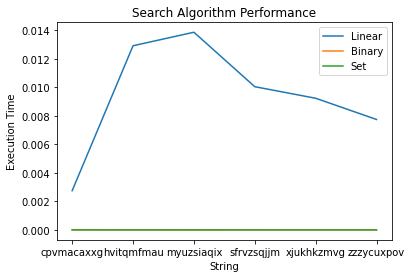

In [ ]:
plt.plot(df['String'], df['Linear Search Time'], label = 'Linear') #plot linear search times
plt.plot(df['String'], df['Binary Search Time'], label = 'Binary') #plot binary search times
plt.plot(df['String'], df['set.remove() Time'], label = 'Set') #plot set.remove() times

plt.title('Search Algorithm Performance')
plt.xlabel('String')
plt.ylabel('Execution Time')
plt.legend()

plt.show()

The linear search algorithm has a significantly slower time complexity than the binary search algorithm and set.remove() method. The plot's y-axis scale conforms to the larger execution times of the linear search, making it hard to observe the graphs between the binary search and set.remove() method. Another plot is created to visualize only the binary search and set.remove() method at a smaller y-axis scale. 

In [ ]:
df = pd.DataFrame(time_list) #create a dataframe of the list of times
df.columns = col_names
df.head()

,String,Linear Search Time,Binary Search Time,set.remove() Time
0,cpvmacaxxg,0.002754,0.000016,0.000002
1,hvitqmfmau,0.012922,0.000011,0.000002
2,myuzsiaqix,0.013870,0.000003,0.000002
3,sfrvzsqjjm,0.010050,0.000012,0.000002
4,xjukhkzmvg,0.009239,0.000010,0.000002


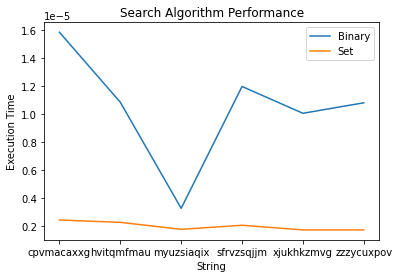

In [ ]:
plt.plot(df['String'], df['Binary Search Time'], label = 'Binary') #plot binary search times
plt.plot(df['String'], df['set.remove() Time'], label = 'Set') #plot set.remove() times
plt.title('Search Algorithm Performance')
plt.xlabel('String')
plt.ylabel('Execution Time')
plt.legend()

plt.show()

Three datasets are created including an unsorted list, sorted list, and a set with the same 100,000 strings. These ten character strings were randomly generated. The 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions of the sorted array are then searched for by the two algorithms and method.

The linear search algorithm on the unsorted list starts with its first element and iterates through each element one by one until it finds the target element. The binary search algorithm on the sorted list effectively narrows the list by half the possible elements each time it iterates through by continuously checking the middle element of the list. The set.remove() method is used to represent a hash table because it operates at the same time complexity as a hash table of O(1). With a hash table, there is no need to search for the element because the hash function will consistently map the key to the same value and different keys to its corresponding values. It will also only return valid keys, so they key needs to exist in the array to return a value for it. Dictionaries in Python are a type of hash table. 

Because hash tables do not need to search for the target, they can retrieve any value in the hash table in the same amount of time regardless of how big the hash table is. Therefore, the average and best case time complexity for hash tables is O(1) or constant time to search, insert, and delete any keys and values. This constant time can be seen by the plot with the binary search and set.remove() method execution times. The set graph stays around the same time execution no matter where the element was in the set. The worst case time complexity is O(n). But this will only be the case if there is a bad hash function that does not map the keys evently throughout the array. Bad hash functions result in collisions that can slow the hash table down. The worst case is if the hash function maps all the keys to the same slot each time, resulting in a very long linked list from that one slot. Then the hash function does need search the linked list for the target key in O(n) steps. With a good hash function and  low load factor to prevent collisions, the hash table will generally have the time complexity of O(1). 

Linear search has a time complexity of O(n), and binary search has a time complexity of O(log n). The linear search runs on linear time while the binary search runs on logarithmic time. In the first plot, the linear search graph consistently takes much longer to search for the target element in the unsorted list than the binary search and set.remove() method do in their corresponding list and set. The table also compares the times between the three different methods, and linear search always takes much longer to find the target element. In the second plot, the binary search takes longer to find the target element than the set.remove() method. The binary search is much faster than the linear search, but the set.remove() method finds the key even faster than binary search. The table also shows that the set.remove() has faster execution times than both binary and linear search for every target string no matter the position. 

For the third string searched in the 50,000th position of the sorted list, the binary search takes a smaller amount of time to find the element as it is in the middle of the string, so it would be the first element this search would check. Then binary search takes longer at the 10,000th position and 100,000th position strings since they are further from the middle elements of each iteration. Binary search varies in its time execution depending on where the element is in the list, but set.remove() method stays consistent and retrieves each key in the same amount of time regardless of where it is located in the set as shown by its straight and constant graph. 

Because hash tables return values so efficiently, data engineers use it for many applications such as lookups, preventing duplicate entries, and as a cache. As the load increases, binary search is a great scalable algorithm to accomodate the growth, but hash tables with a good hash function will still be more efficient. This is why many companies implement caching to not have to rerun certain same requests and pages that many people often refer to. Instead, the page and its data is stored in the hash table, so it can be efficiently pulled up instead of having to be loaded the same page each time for users. And because the hash function has constant time, the increase in load will not affect the hash function and its ability to retrieve keys in the same amount of time as before the increase, maintaining performance. 